Random Forest modelinin eğitim süresi: 5.1653 saniye
Gradient Boosting modelinin eğitim süresi: 4.6988 saniye
Elastic Net modelinin eğitim süresi: 0.4205 saniye
SVR modelinin eğitim süresi: 69.5385 saniye
Neural Network modelinin eğitim süresi: 34.1676 saniye
KNN modelinin eğitim süresi: 1.2972 saniye
xGBoost modelinin eğitim süresi: 0.4063 saniye
CatBoost modelinin eğitim süresi: 4.1250 saniye
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1344
[LightGBM] [Info] Number of data points in the train set: 10810, number of used features: 353
[LightGBM] [Info] Start training from score 39.490060
LightGBM modelinin eğitim süresi: 0.3437 saniye
Tüm Modellerin Sonuçları:
               Model  Train MAPE  Test MAPE
0      Random Forest    0.061693   0.188364
1  Gradient Boosting    0.280896

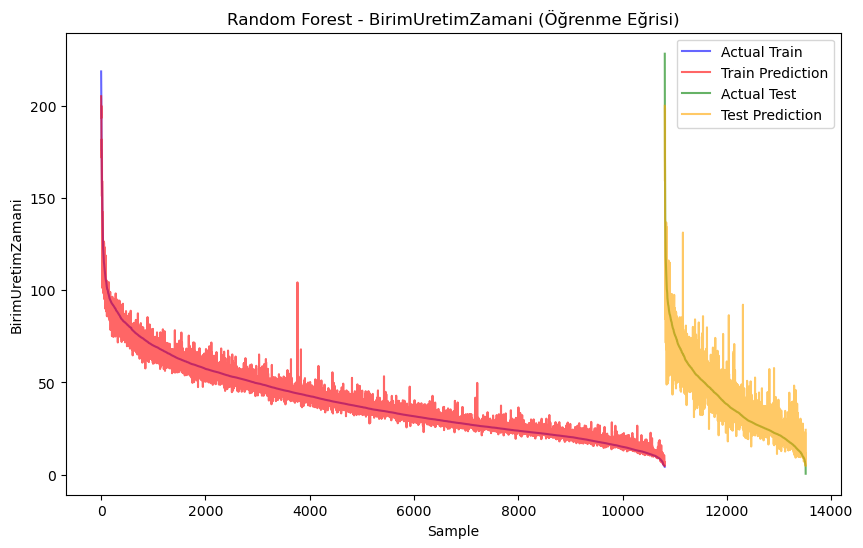

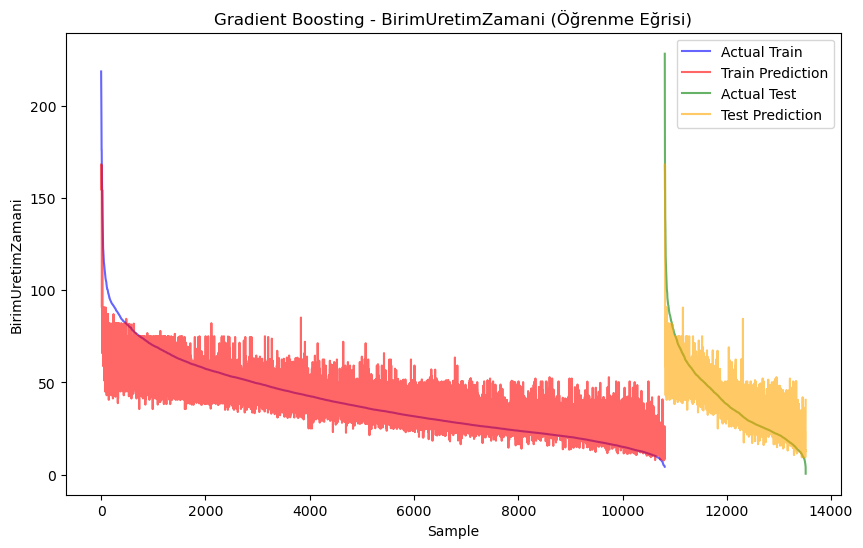

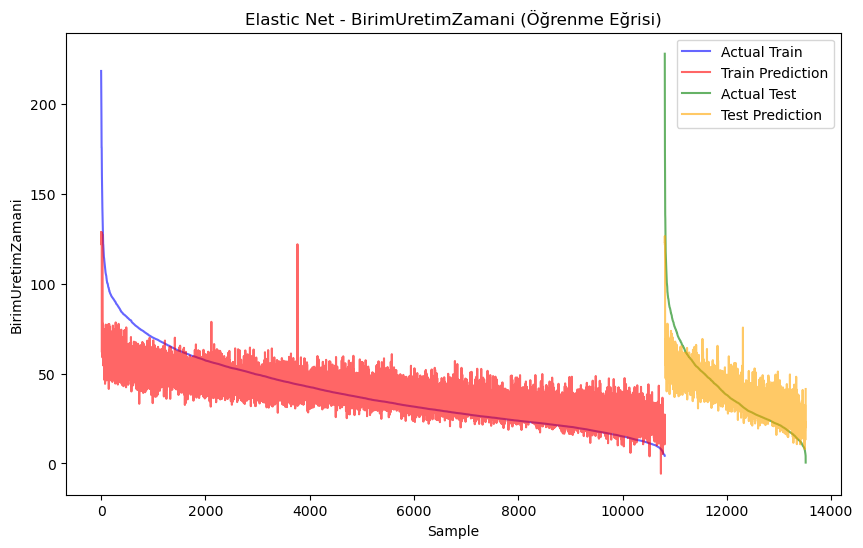

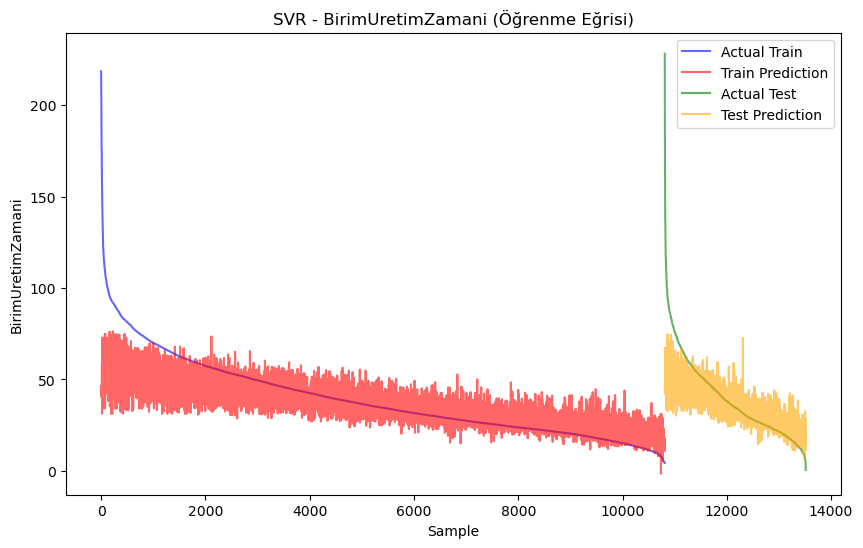

C:\Users\berk_\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


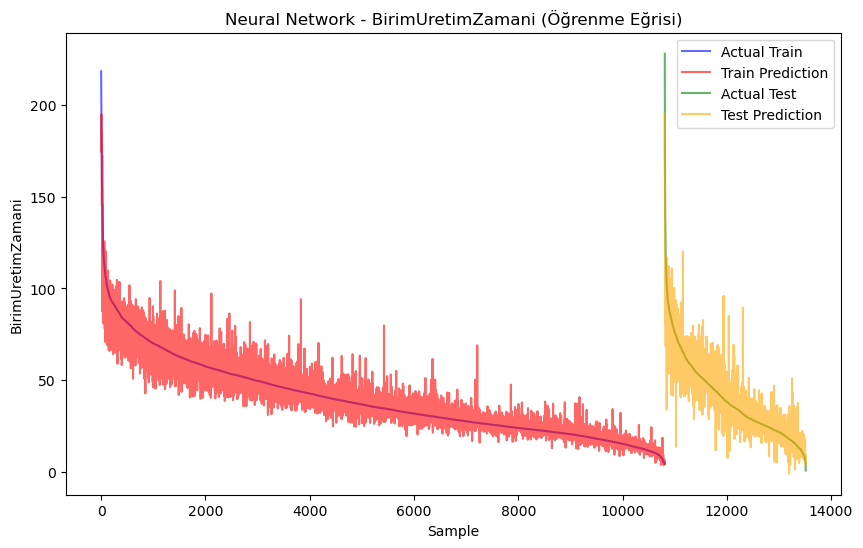

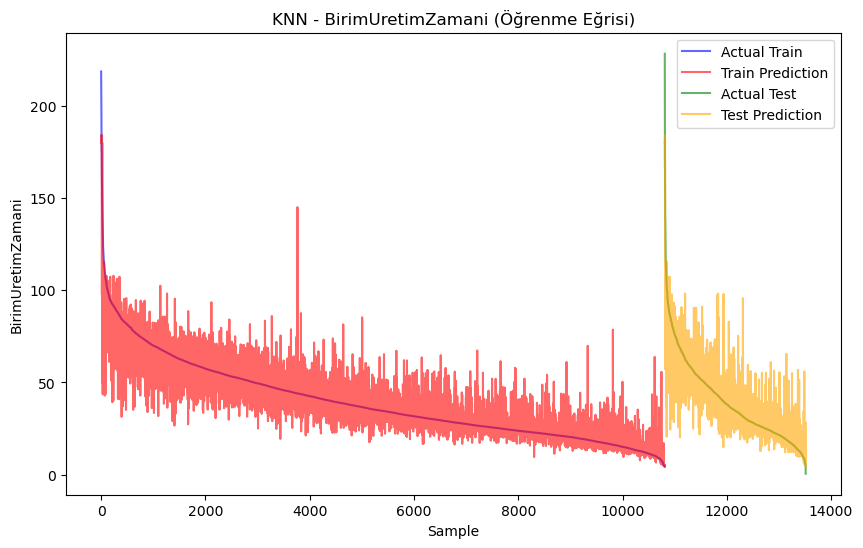

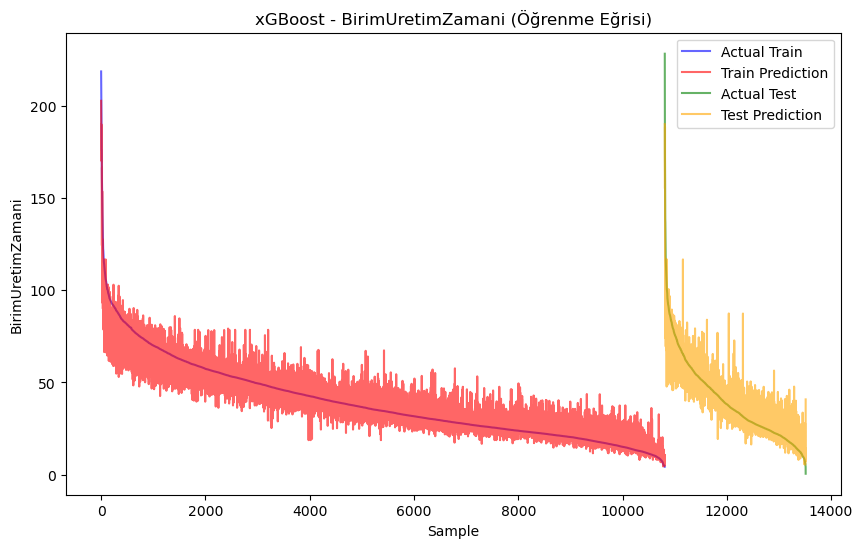

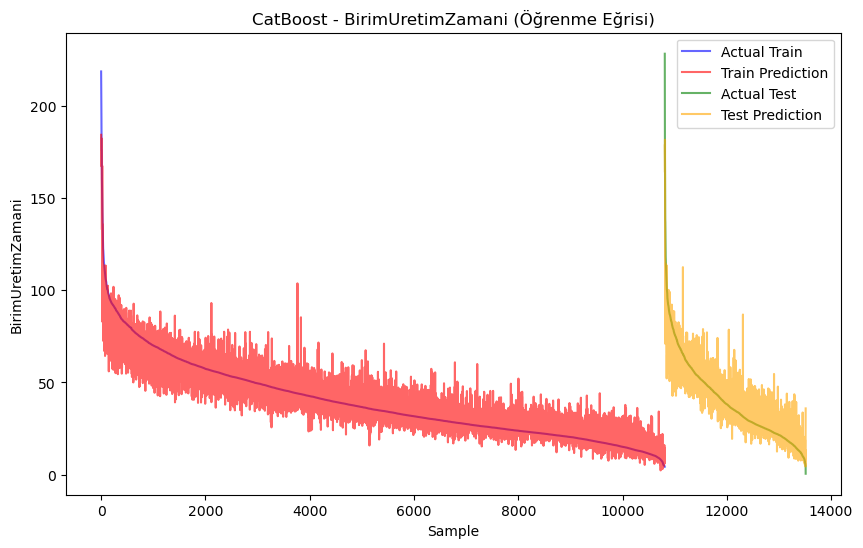

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1344
[LightGBM] [Info] Number of data points in the train set: 10810, number of used features: 353
[LightGBM] [Info] Start training from score 39.490060


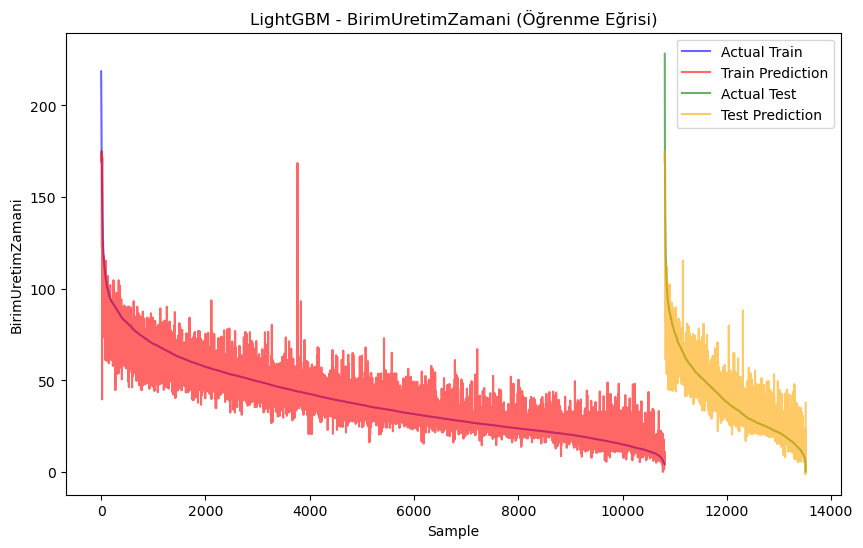

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt
import time 

# Veriyi yükleyelim
data_path = 'birim_uretim_zamani_duzenlenmis.csv'
data = pd.read_csv(data_path)

# Özellik ve hedef değişkenleri belirleme
X = data[['ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi', 'Uretim','SIPARIS_ADEDI','GIYSI_GRUBU','GIYSI_CINSI','GIYSI_CINSI_DETAYI']]
y = data['BirimUretimZamani']  # Hedef değişken

# Kategorik değişkenleri sayısallaştırma (One-hot encoding)
X = pd.get_dummies(X, columns=['ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi','GIYSI_GRUBU','GIYSI_CINSI','GIYSI_CINSI_DETAYI'])

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme (Sadece sayısal özellikleri ölçeklendirelim)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelleri tanımlayalım
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000),
    'KNN': KNeighborsRegressor(n_jobs=-1),
    'xGBoost': xgb.XGBRegressor(random_state=42, n_jobs=-1),
    'CatBoost': cb.CatBoostRegressor(random_state=42, silent=True),
    'LightGBM': lgb.LGBMRegressor(random_state=42, n_jobs=-1)
}

# Her model için sonuçları tutmak için boş bir DataFrame
results = pd.DataFrame(columns=['Model', 'Train MAPE', 'Test MAPE'])

# Tüm modelleri eğitip değerlendiriyoruz
for model_name, model in models.items():
    
    start_time = time.time()
    
    # Modeli eğit
    model.fit(X_train_scaled, y_train)
    
    # Tahmin yap (Eğitim ve Test Seti)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # MAPE hesaplayalım
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    
    # Sonuçları bir DataFrame olarak oluşturup sonuçlar DataFrame'ine ekleyelim
    result_row = pd.DataFrame({
        'Model': [model_name],
        'Train MAPE': [train_mape],
        'Test MAPE': [test_mape]
    })
    results = pd.concat([results, result_row], ignore_index=True)
    
    print(f"{model_name} modelinin eğitim süresi: {elapsed_time:.4f} saniye")

print("----------------------------------------------")    

# Sonuçların tablo olarak gösterilmesi
print(results)

# Overfitting kontrolü: Eğer Test MAPE, Train MAPE'den belirgin şekilde yüksekse, bu overfitting riski olduğuna işaret edebilir.
results['Overfitting Risk'] = results.apply(lambda row: 'Yüksek' if row['Test MAPE'] > row['Train MAPE'] * 1.2 else 'Düşük', axis=1)
print(results)

# Öğrenme Eğrileri Çizimi (Her model için)
for model_name, model in models.items():
    plt.figure(figsize=(10, 6))
    
    # Modeli eğit
    model.fit(X_train_scaled, y_train)
    
    # Eğitim ve Test seti üzerinde tahminler yap
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Eğitim setini sıralama (gerçek değerlere göre)
    sorted_train_indices = np.argsort(-y_train)  # Büyükten küçüğe sıralama
    y_train_sorted = y_train.iloc[sorted_train_indices]
    y_train_pred_sorted = y_train_pred[sorted_train_indices]
    
    # Test setini sıralama (gerçek değerlere göre)
    sorted_test_indices = np.argsort(-y_test)  # Büyükten küçüğe sıralama
    y_test_sorted = y_test.iloc[sorted_test_indices]
    y_test_pred_sorted = y_test_pred[sorted_test_indices]
    
    # Eğitim hatası (Learning Curve)
    plt.plot(y_train_sorted.values, label='Actual Train', color='blue', alpha=0.6)
    plt.plot(y_train_pred_sorted, label='Train Prediction', color='red', alpha=0.6)
    
    # Test hatası (Learning Curve)
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_sorted.values, label='Actual Test', color='green', alpha=0.6)
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_pred_sorted, label='Test Prediction', color='orange', alpha=0.6)
    
    # Grafiğin başlık ve etiketleri
    plt.title(f'{model_name} - BirimUretimZamani (Öğrenme Eğrisi)')
    plt.xlabel('Sample')
    plt.ylabel('BirimUretimZamani')
    plt.legend()
    plt.show()

Random Forest modelinin eğitim süresi: 3.5157 saniye
Gradient Boosting modelinin eğitim süresi: 4.8148 saniye
Elastic Net modelinin eğitim süresi: 0.3083 saniye
SVR modelinin eğitim süresi: 76.5612 saniye
Neural Network modelinin eğitim süresi: 28.5698 saniye
KNN modelinin eğitim süresi: 1.2639 saniye
xGBoost modelinin eğitim süresi: 0.4096 saniye
CatBoost modelinin eğitim süresi: 4.6086 saniye
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 10810, number of used features: 354
[LightGBM] [Info] Start training from score 39.490060
LightGBM modelinin eğitim süresi: 0.4223 saniye
----------------------------------------------
               Model  Train MAPE  Test MAPE
0      Random Forest    0.050060   0.158914
1  Gradient

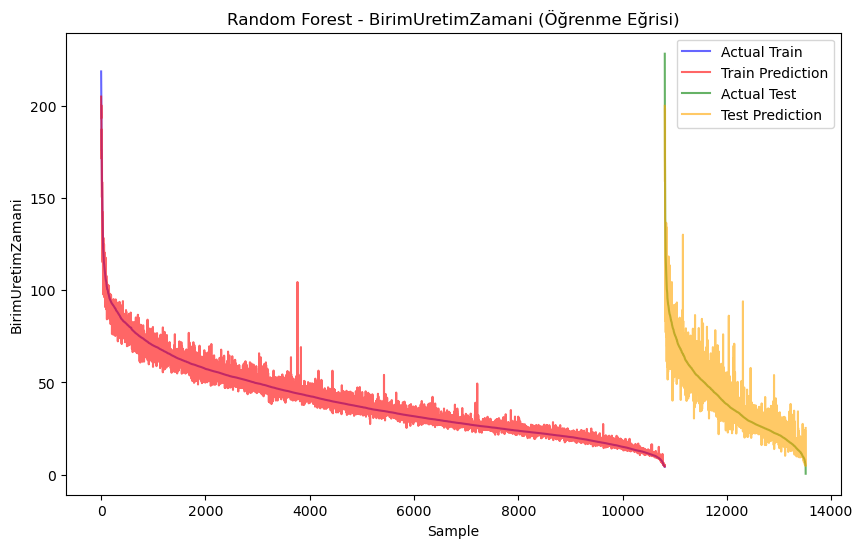

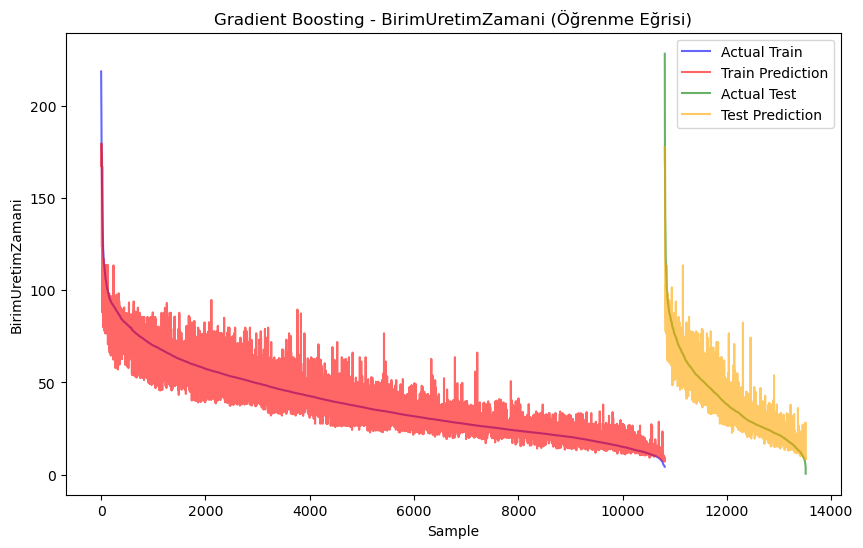

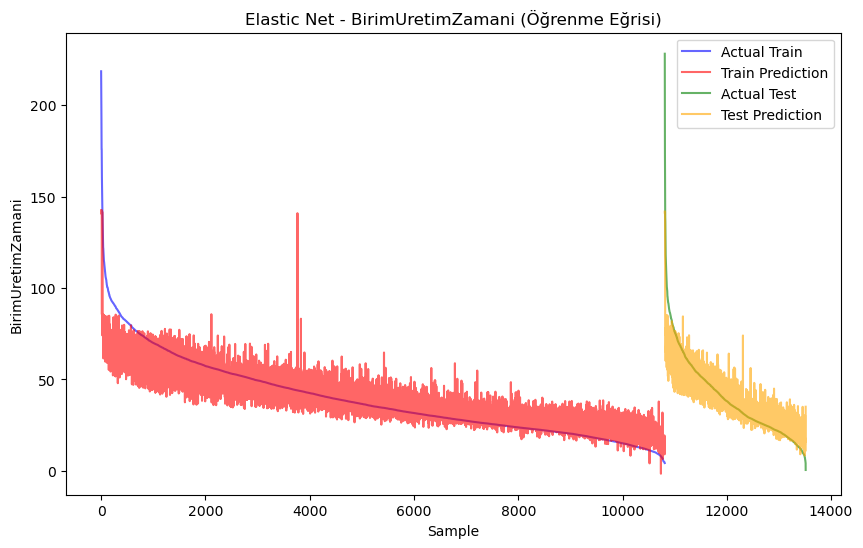

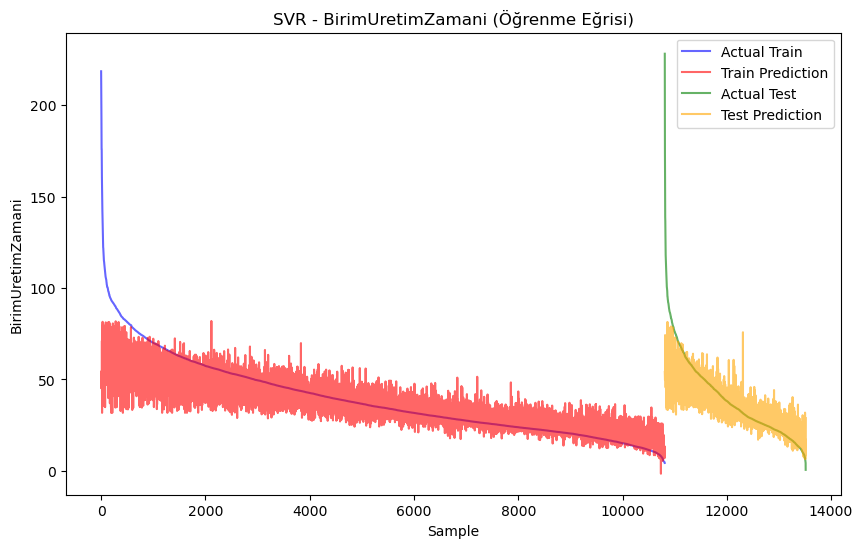

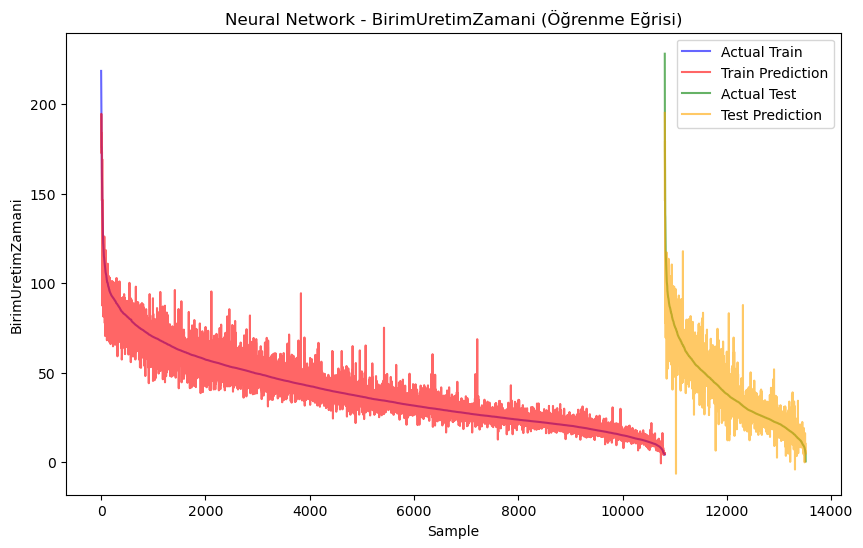

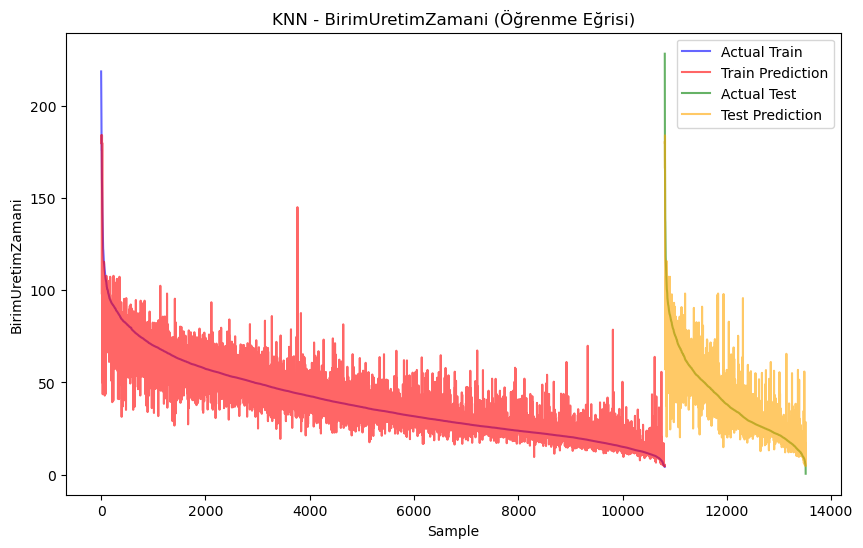

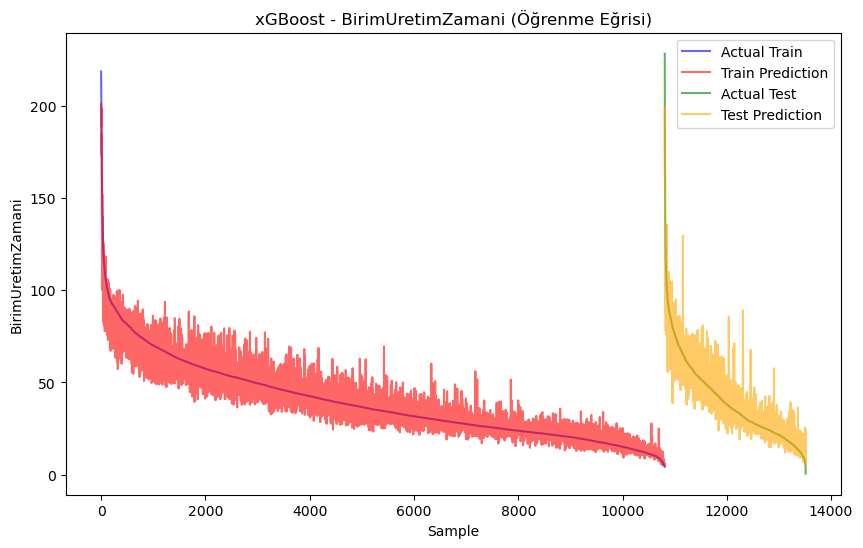

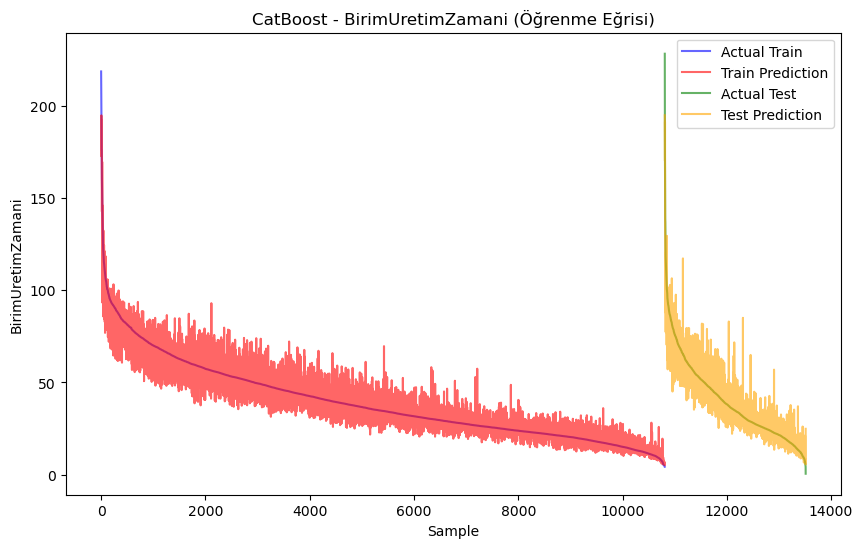

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 10810, number of used features: 354
[LightGBM] [Info] Start training from score 39.490060


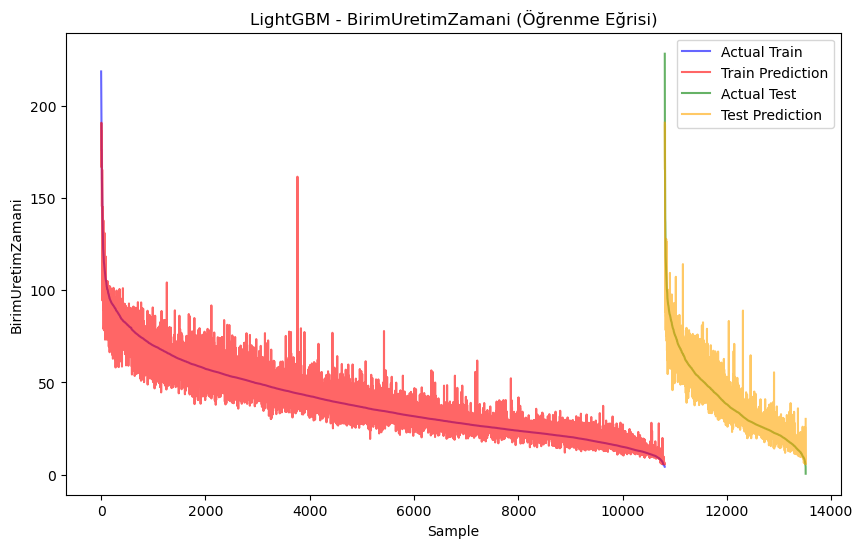

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Veriyi yükleyelim
data_path = 'birim_uretim_zamani_duzenlenmis.csv'
data = pd.read_csv(data_path)

# Özellik ve hedef değişkenleri belirleme
X = data[['ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi', 'Uretim','Etut','SIPARIS_ADEDI','GIYSI_GRUBU','GIYSI_CINSI','GIYSI_CINSI_DETAYI']]
y = data['BirimUretimZamani']  # Hedef değişken

# Kategorik değişkenleri sayısallaştırma (One-hot encoding)
X = pd.get_dummies(X, columns=['ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi','GIYSI_GRUBU','GIYSI_CINSI','GIYSI_CINSI_DETAYI'])


# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme (Sadece sayısal özellikleri ölçeklendirelim)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelleri tanımlayalım
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000),
    'KNN': KNeighborsRegressor(n_jobs=-1),
    'xGBoost': xgb.XGBRegressor(random_state=42, n_jobs=-1),
    'CatBoost': cb.CatBoostRegressor(random_state=42, silent=True),
    'LightGBM': lgb.LGBMRegressor(random_state=42, n_jobs=-1)
}

# Her model için sonuçları tutmak için boş bir DataFrame
results = pd.DataFrame(columns=['Model', 'Train MAPE', 'Test MAPE'])

# Tüm modelleri eğitip değerlendiriyoruz
for model_name, model in models.items():
    
    start_time = time.time()
    # Modeli eğit
    model.fit(X_train_scaled, y_train)
    
    # Tahmin yap (Eğitim ve Test Seti)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # MAPE hesaplayalım
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    
    # Sonuçları bir DataFrame olarak oluşturup sonuçlar DataFrame'ine ekleyelim
    result_row = pd.DataFrame({
        'Model': [model_name],
        'Train MAPE': [train_mape],
        'Test MAPE': [test_mape]
    })
    results = pd.concat([results, result_row], ignore_index=True)
    
    print(f"{model_name} modelinin eğitim süresi: {elapsed_time:.4f} saniye")

print("----------------------------------------------")   

# Sonuçların tablo olarak gösterilmesi
print(results)

# Overfitting kontrolü: Eğer Test MAPE, Train MAPE'den belirgin şekilde yüksekse, bu overfitting riski olduğuna işaret edebilir.
results['Overfitting Risk'] = results.apply(lambda row: 'Yüksek' if row['Test MAPE'] > row['Train MAPE'] * 1.2 else 'Düşük', axis=1)
print(results)

# Öğrenme Eğrileri Çizimi (Her model için)
for model_name, model in models.items():
    plt.figure(figsize=(10, 6))
    
    # Modeli eğit
    model.fit(X_train_scaled, y_train)
    
    # Eğitim ve Test seti üzerinde tahminler yap
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Eğitim setini sıralama (gerçek değerlere göre)
    sorted_train_indices = np.argsort(-y_train)  # Büyükten küçüğe sıralama
    y_train_sorted = y_train.iloc[sorted_train_indices]
    y_train_pred_sorted = y_train_pred[sorted_train_indices]
    
    # Test setini sıralama (gerçek değerlere göre)
    sorted_test_indices = np.argsort(-y_test)  # Büyükten küçüğe sıralama
    y_test_sorted = y_test.iloc[sorted_test_indices]
    y_test_pred_sorted = y_test_pred[sorted_test_indices]
    
    # Eğitim hatası (Learning Curve)
    plt.plot(y_train_sorted.values, label='Actual Train', color='blue', alpha=0.6)
    plt.plot(y_train_pred_sorted, label='Train Prediction', color='red', alpha=0.6)
    
    # Test hatası (Learning Curve)
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_sorted.values, label='Actual Test', color='green', alpha=0.6)
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_pred_sorted, label='Test Prediction', color='orange', alpha=0.6)
    
    # Grafiğin başlık ve etiketleri
    plt.title(f'{model_name} - BirimUretimZamani (Öğrenme Eğrisi)')
    plt.xlabel('Sample')
    plt.ylabel('BirimUretimZamani')
    plt.legend()
    plt.show()